**Course:**<br>
https://www.youtube.com/watch?v=Mf8jna42p2M&index=7&list=PLlMkM4tgfjnJ3I-dbhO9JTw7gNty6o_2m<br>
https://www.kaggle.com/mlg-ulb/creditcardfraud<br>

In [5]:
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


Text(0,0.5,'Frequency')

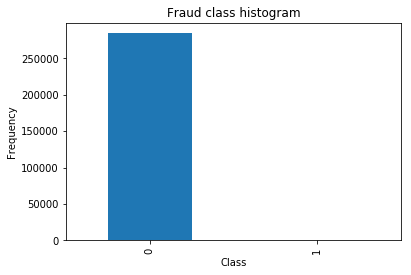

In [6]:
# Data has strong bias
data = pd.read_csv('creditcard.csv')
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
class CreditDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        data = pd.read_csv(csv_file)
        self.len = data.shape[0]
        self.x_data = data.drop(['Class'], axis=1)
        self.y_data = data[['Class']]
    def __len__(self):
        return self.len
    def __getitem__(self, index):
        return torch.tensor(self.x_data.iloc[index].values), \
                torch.tensor(self.y_data.iloc[index].values, dtype=torch.float)

In [15]:
train_dataset = CreditDataset("./creditcard.csv")
train_loader = DataLoader(dataset=train_dataset, batch_size=1, shuffle=True, num_workers=2)

In [16]:
# 1. Design Model
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = torch.nn.Linear(30, 60)
        self.l2 = torch.nn.Linear(60, 60)
        self.l3 = torch.nn.Linear(60, 60)
        self.l4 = torch.nn.Linear(60, 30)
        self.l5 = torch.nn.Linear(30, 1)
        self.activation_fn = torch.nn.Sigmoid()
    def forward(self, x):
        x = self.activation_fn(self.l1(x))
        x = self.activation_fn(self.l2(x))
        x = self.activation_fn(self.l3(x))
        x = self.activation_fn(self.l4(x))
        x = self.activation_fn(self.l5(x))
        return x

In [20]:
# 2. Define loss and optimizer
model = Model()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [21]:
# 3. Training
model.train()
for epoch in range(2):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.float(), target.float() # Conver to float since double is slower on GPU
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output.float(), target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

Train Epoch: 0 [0/284807 (0%)]	Loss: 0.598592
Train Epoch: 0 [100/284807 (0%)]	Loss: 0.064352
Train Epoch: 0 [200/284807 (0%)]	Loss: 0.027546
Train Epoch: 0 [300/284807 (0%)]	Loss: 0.016056
Train Epoch: 0 [400/284807 (0%)]	Loss: 0.010706
Train Epoch: 0 [500/284807 (0%)]	Loss: 0.007660
Train Epoch: 0 [600/284807 (0%)]	Loss: 0.009376
Train Epoch: 0 [700/284807 (0%)]	Loss: 0.007956
Train Epoch: 0 [800/284807 (0%)]	Loss: 0.006410
Train Epoch: 0 [900/284807 (0%)]	Loss: 0.005257
Train Epoch: 0 [1000/284807 (0%)]	Loss: 0.005922
Train Epoch: 0 [1100/284807 (0%)]	Loss: 0.004941
Train Epoch: 0 [1200/284807 (0%)]	Loss: 0.005579
Train Epoch: 0 [1300/284807 (0%)]	Loss: 0.004707
Train Epoch: 0 [1400/284807 (0%)]	Loss: 0.004022
Train Epoch: 0 [1500/284807 (1%)]	Loss: 0.003476
Train Epoch: 0 [1600/284807 (1%)]	Loss: 0.003033
Train Epoch: 0 [1700/284807 (1%)]	Loss: 0.002668
Train Epoch: 0 [1800/284807 (1%)]	Loss: 0.003458
Train Epoch: 0 [1900/284807 (1%)]	Loss: 0.003050
Train Epoch: 0 [2000/284807 (1%)

Process Process-6:
Process Process-5:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.6/multiprocessing/queues.py", line 104, in get
    if not self._poll(timeout):
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
  File "/opt/conda/lib/python3.6/multiprocessing/c

RuntimeError: DataLoader worker (pid 1005) exited unexpectedly with exit code 1. Details are lost due to multiprocessing. Rerunning with num_workers=0 may give better error trace.